### <p style='text-align:center;'> Titanic Dataset </p> ###

<u> About the dataset:</u> This dataset contains information about 891 passengers who were on the famous Titanic ship.   

Information like gender, age, passenger's class, and whether the person survived or not can help answer a number of questions using, <span style='color:blue'> aggregate functions  </span>  like  mean and count,<span style='color:blue'> groupby, </span> and <span style='color:blue'> pivot_table </span> functions. 

Questions answered:
1. What is the fraction of men to women who were on the ship?
1. Of those who survived, what is the gender break down?
1. Of those who survived, was social class a factor? 
1. What is the age distribution on the ship? 
1. Did age influence the chance of survival? 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
#titanic = sns.load_dataset('titanic')

In [5]:
cd titanic

C:\Users\maria\Documents\python for github\2024\titanic


In [6]:
titanic = pd.read_csv('./train.csv')

In [7]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [49]:
titanic.shape

(891, 12)

In [51]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [54]:
del titanic['Ticket']
del titanic['Fare']
del titanic['Cabin']
del titanic['Embarked']

In [55]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0


###### The columns are: ######

- Survived: 1 for yes and 0 for no

- Pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
    

- Age: age in years   

- sibsp:	# of siblings / spouses aboard the Titanic

- parch: The dataset defines family relations in this way...
    * Parent mother, father
    * Child = daughter, son, stepdaughter, stepson

In [6]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
titanic['Age'].isnull().sum()

177

In [16]:
titanic[['Survived', 'Sex']].groupby('Sex').count()

,Survived
Sex,
female,314
male,577


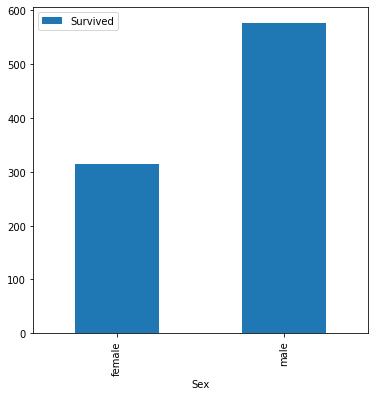

In [26]:
titanic[['Survived', 'Sex']].groupby('Sex').count().plot(kind='bar', figsize=(6,6))

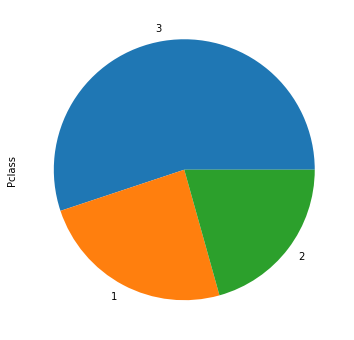

In [23]:
titanic['Pclass'].value_counts().plot(kind='pie', figsize=(6,6))

In [27]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [29]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [30]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [31]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].count().unstack()

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [48]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass', aggfunc='mean', margins=True, margins_name='Total')

Pclass,1,2,3,Total
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
Total,0.629630,0.472826,0.242363,0.383838


In [57]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [61]:
age = pd.cut(titanic['Age'], [0, 10, 18, 40, 60, 80])

In [66]:
titanic.pivot_table('Survived', ['Sex', age], 'Pclass', aggfunc='count')

Pclass              1     2      3
Sex    Age                        
female (0, 10]    1.0   8.0   22.0
       (10, 18]  10.0   6.0   21.0
       (18, 40]  48.0  47.0   50.0
       (40, 60]  24.0  13.0    8.0
       (60, 80]   2.0   NaN    1.0
male   (0, 10]    2.0   9.0   22.0
       (10, 18]   3.0   6.0   29.0
       (18, 40]  46.0  63.0  171.0
       (40, 60]  38.0  18.0   27.0
       (60, 80]  12.0   3.0    4.0

In [68]:
age2 = pd.cut(titanic['Age'], [0,18,80])
titanic.pivot_table('Survived',['Sex', age2],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [8]:
titanic2 = pd.read_csv('./test.csv')

In [9]:
titanic2.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [10]:
titanic2.shape

(418, 11)

In [11]:
titanic.shape

(891, 12)

In [13]:
data = pd.concat([titanic, titanic2])

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [14]:
data.shape

(1309, 12)

In [15]:
data.head(3)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282


In [16]:
del data['Ticket']
del data['Cabin']
del data['Embarked']
del data['Fare']
del data['PassengerId']
del data['Name']

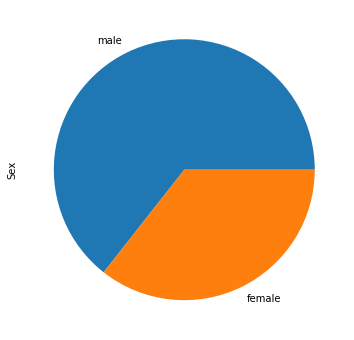

In [17]:
data['Sex'].value_counts().plot(kind='pie', figsize=(6,6))

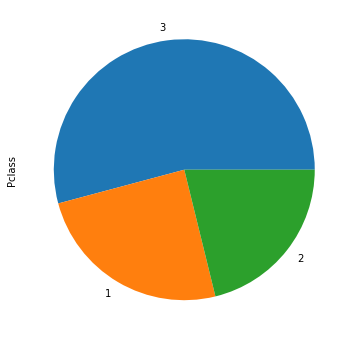

In [18]:
data['Pclass'].value_counts().plot(kind='pie', figsize=(6,6))

In [19]:
age3 = pd.cut(data['Age'], [0,10, 18, 40, 60, 80])

In [ ]:
data.pivot_table('Survived', ['Sex',])